In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df = df.drop(["id", "Unnamed: 32"], axis=1)
X = df.drop(['diagnosis'], axis=1)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
y = df['diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9298245614035088
Confusion Matrix:
[[75  1]
 [ 7 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        76
           1       0.97      0.82      0.89        38

    accuracy                           0.93       114
   macro avg       0.94      0.90      0.92       114
weighted avg       0.93      0.93      0.93       114



requires too many iterations and can be improved with data normalization

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test_scaled)

In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9473684210526315
Confusion Matrix:
[[75  1]
 [ 5 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        76
           1       0.97      0.87      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



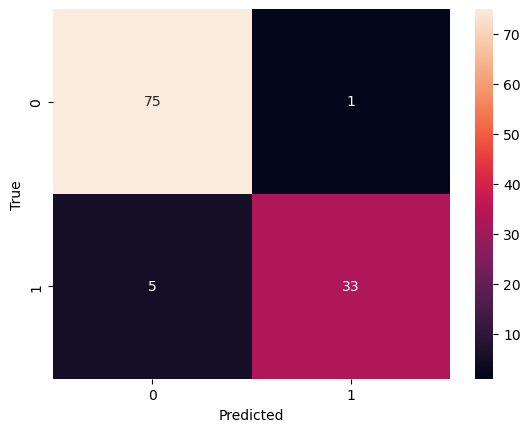

In [355]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

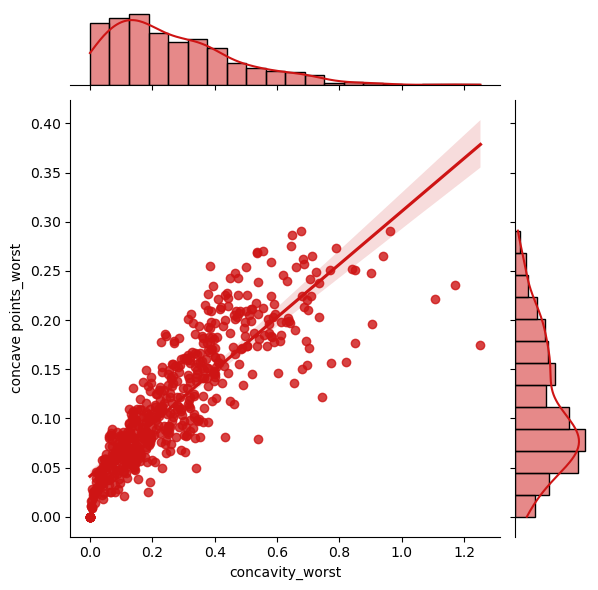

In [356]:
sns.jointplot(x=X['concavity_worst'], y=X['concave points_worst'], kind="reg", color="#ce1414")
plt.show()

In [357]:
#Using a different training model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train_val_df)
y_pred = model.predict(X_test_scaled)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9385964912280702
Confusion Matrix:
[[75  1]
 [ 6 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        76
           1       0.97      0.84      0.90        38

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



In [358]:
#  drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']

In [359]:
X1 = X.drop(cols, axis=1)  # Features
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   area_mean               569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   concavity_mean          569 non-null    float64
 7   concave points_mean     569 non-null    float64
 8   symmetry_mean           569 non-null    float64
 9   fractal_dimension_mean  569 non-null    float64
 10  radius_se               569 non-null    float64
 11  texture_se              569 non-null    float64
 12  perimeter_se            569 non-null    float64
 13  area_se                 569 non-null    float64
 14  smoothness_se           569 non-null    fl

In [360]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=51)

In [361]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [362]:
y_pred = model.predict(X_test_scaled)

In [363]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9122807017543859
Confusion Matrix:
[[76  0]
 [10 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        76
           1       1.00      0.74      0.85        38

    accuracy                           0.91       114
   macro avg       0.94      0.87      0.89       114
weighted avg       0.92      0.91      0.91       114



In [364]:
# drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
X2 = X.drop(cols, axis=1)

# drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
X2 = X2.drop(cols, axis=1)

In [365]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   radius_se                569 non-null    float64
 7   texture_se               569 non-null    float64
 8   smoothness_se            569 non-null    float64
 9   compactness_se           569 non-null    float64
 10  symmetry_se              569 non-null    float64
 11  fractal_dimension_se     569 non-null    float64
 12  radius_worst             569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  perimeter_worst          5

In [366]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=51)

In [380]:
scaler = MinMaxScaler()
# Scale data 0-1
X2_train_scaled = StandardScaler().fit_transform(X2_train)
X2_test_scaled = StandardScaler().fit_transform(X2_test)

model = LogisticRegression()
model.fit(X2_train_scaled, y2_train)

LogisticRegression()

In [381]:
y2_pred = model.predict(X2_test_scaled)

In [382]:
# Accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{class_report}')
X2

Accuracy: 0.956140350877193
Confusion Matrix:
[[75  1]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.97      0.89      0.93        38

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [384]:
#Using a different training model
model = LogisticRegression(solver='liblinear')
model.fit(X2_train_scaled, y2_train)
y2_pred = model.predict(X2_test_scaled)
# Accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.956140350877193
Confusion Matrix:
[[75  1]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.97      0.89      0.93        38

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.95652174 0.97826087 1.         0.95652174 0.91304348 0.97777778
 0.95555556 0.97777778 0.88888889 0.95555556]
Mean CV accuracy: 0.9559903381642512
